In [3]:
import numpy as np
from collections import *
import pickle
import nltk
from nltk.corpus import wordnet
import re
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/spider/nltk_data...


True

In [7]:
class Words:
    def __init__(self) -> None:
        self.words = set()
        self.word_map = defaultdict(set)
        self.graph = None

    def load_words(self):
        self.words.update(
            np.loadtxt(
                'database/words.txt',
                dtype=str
            )
        )

        self._load_wordnet()
        self.map_words()

    @staticmethod
    def generate(word):
        for i in range(len(word)):
            yield word[:i] + '_' + word[i+1:]

    def _load_wordnet(self):
        for synset in wordnet.all_synsets():
            for lemma in synset.lemmas():
                name = lemma.name().lower()
                if re.match('^[a-z]*$', name):
                    self.words.add(name.lower())

    def map_words(self):
        for w in self.words:
            self.word_map[len(w)].add(w)

        def construct_graph(self, dst):
            graph = defaultdict(lambda : defaultdict(set))
            for length, words in self.word_map.items():
                for word in words:
                    for i in range(len(word)):
                        pattern = word[:i] + '_' + word[i+1:]
                        graph[length][pattern].add(word)
            
        with open(dst, 'wb+') as fd:
            pickle.dump(dict(graph), fd)
        self.graph = graph
    
    def init(self):
        self.load_words()
        self.construct_graph('graph.pkl')

        print(f"Loaded {len(self.words)}")

        with open('words.pkl', 'wb+') as fd:
            pickle.dump(self.words, fd)

In [8]:
words = Words()
words.init()

Loaded 379557


In [20]:
words_len = defaultdict(int)
for v in sorted(words.words):
    words_len[len(v)] += 1

Text(0.5, 1.0, 'word length vs frequency graph')

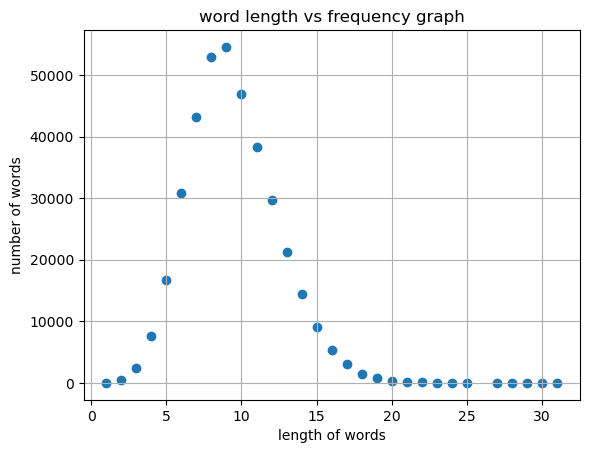

In [22]:
plt.scatter(words_len.keys(), words_len.values())
plt.xlabel('length of words')
plt.ylabel('number of words')
plt.grid(True)
plt.title('word length vs frequency graph')

In [13]:
len(words.words)

379557

415620